In [2]:
import qflib as qf
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

In [3]:
time_values = np.arange(0, 2.25, 0.25)
num_rows = len(time_values)  

data = {
    'Time': time_values,
    'Spot': [100.00, 105.00, 110.00, 92.00, 103.00, 90.00, 110.00, 95.00, 88.00],
    'Price': [17.78, 19.72] + [np.nan] * (num_rows - 2),
    'Delta': [0.60, 0.64] + [np.nan] * (num_rows - 2),
    'Growth': [1.0000, 1.0101] + [np.nan] * (num_rows - 2),
    'Opt_Units': [-10000, -10000] + [np.nan] * (num_rows - 2),
    'Stk_Units': [5960.30] + [np.nan] * (num_rows - 1),
    'Opt_Val': [-177773.03] + [np.nan] * (num_rows - 1),
    'Stk_Val': [596030.41] + [np.nan] * (num_rows - 1),
    'Cash_Acc': [-418257.38] + [np.nan] * (num_rows - 1),
    'Total_Val': [0] + [np.nan] * (num_rows - 1),
}

df = pd.DataFrame(data)

In [4]:
IntRate = 0.04
DivYield = 0.02
Volatility = 0.3
Strike = 100.00

for i, (Time, Spot) in enumerate(zip(df['Time'], df['Spot'])):
    price_greeks = qf.euroBS(1, Spot, Strike, 2 - Time, IntRate, DivYield, Volatility)
    
    Price= price_greeks[0]
    df.at[i, 'Price'] = Price

    Delta = price_greeks[1]
    df.at[i, 'Delta'] = Delta

    Growth = np.exp(IntRate * (Time - (df.at[i - 1, 'Time'] if i > 0 else Time)))
    df.at[i, 'Growth'] = Growth

    Opt_Units = -10000
    df.at[i, 'Opt_Units'] = Opt_Units

    Stk_Units = Delta * -Opt_Units
    df.at[i, 'Stk_Units'] = Stk_Units

    Opt_Val = Price * Opt_Units
    df.at[i, 'Opt_Val'] = Opt_Val

    Stk_Val = Spot * Stk_Units
    df.at[i, 'Stk_Val'] = Stk_Val

    if i == 0:
        Cash_Acc = -Opt_Val - Stk_Val
    else:
        Prev_Growth = df.at[i - 1, 'Cash_Acc'] * Growth
        Change_Hedge = Opt_Units * (Delta - df.at[i - 1, 'Delta']) * Spot
        Cash_Acc = Prev_Growth + Change_Hedge
    df.at[i, 'Cash_Acc'] = Cash_Acc

    Total_Val = Cash_Acc + Stk_Val + Opt_Val
    df.at[i, 'Total_Val'] = Total_Val

Total_PNL = df['Total_Val'].iloc[-1]
print(df)
display(Markdown(f"### The final P&L is $**{Total_PNL:.2f}**"))


   Time   Spot      Price     Delta   Growth  Opt_Units    Stk_Units  \
0  0.00  100.0  17.777303  0.596030  1.00000   -10000.0  5960.304084   
1  0.25  105.0  19.716559  0.636273  1.01005   -10000.0  6362.727734   
2  0.50  110.0  21.762433  0.679434  1.01005   -10000.0  6794.341178   
3  0.75   92.0   9.796680  0.485182  1.01005   -10000.0  4851.822012   
4  1.00  103.0  14.346481  0.611344  1.01005   -10000.0  6113.436213   
5  1.25   90.0   5.975691  0.407596  1.01005   -10000.0  4075.958380   
6  1.50  110.0  15.232479  0.719351  1.01005   -10000.0  7193.507103   
7  1.75   95.0   3.818531  0.405606  1.01005   -10000.0  4056.061287   
8  2.00   88.0   0.000000  0.000000  1.01005   -10000.0     0.000000   

         Opt_Val        Stk_Val       Cash_Acc     Total_Val  
0 -177773.031045  596030.408427 -418257.377382      0.000000  
1 -197165.585981  668086.412094 -464715.417155   6205.408958  
2 -217624.330729  747377.529594 -516863.363573  12889.835293  
3  -97966.802243  446367.62

### The final P&L is $**886.44**

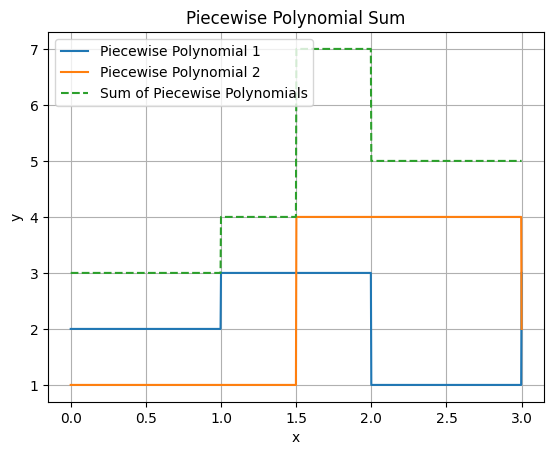

### The graph of the sum of the piecewise polynomials is correct.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 1000)

breakpoints1 = np.array([0, 1, 2, 3]) 
values1 = np.array([2, 3, 1, 3]) 

breakpoints2 = np.array([0, 1.5, 3])  
values2 = np.array([1, 4, 2])  

order = 0

pp_sum = qf.ppolySum(breakpoints1, values1, breakpoints2, values2, order)
breakpoints_sum = pp_sum[:, 0]
values_sum = pp_sum[:, 1]

pp_sum_eval = qf.ppolyEval(breakpoints_sum, values_sum, order, x, 0)
pp1 = qf.ppolyEval(breakpoints1, values1, order, x, 0)
pp2 = qf.ppolyEval(breakpoints2, values2, order, x, 0)

plt.plot(x, pp1, label='Piecewise Polynomial 1')
plt.plot(x, pp2, label='Piecewise Polynomial 2')
plt.plot(x, pp_sum_eval, label='Sum of Piecewise Polynomials', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Polynomial Sum')
plt.legend()
plt.grid()
plt.show()

display(Markdown(f"### The graph of the sum of the piecewise polynomials is correct."))